In [33]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

from sklearn.preprocessing import MinMaxScaler
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [34]:
df = pd.read_csv('../../data/cleaned_data.csv')
df = df['close'].values

In [35]:
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.008435
p-value: 0.750176


In [50]:
scaler = MinMaxScaler()
train = df[:-15]
test = df[-15:]
# train = train.reshape(-1,1)
# test = test.reshape(-1,1)
# scaler = scaler.fit(train)
# train_normalized = scaler.transform(train).squeeze()
# test_normalized = scaler.transform(test).squeeze()
train_normalized = train

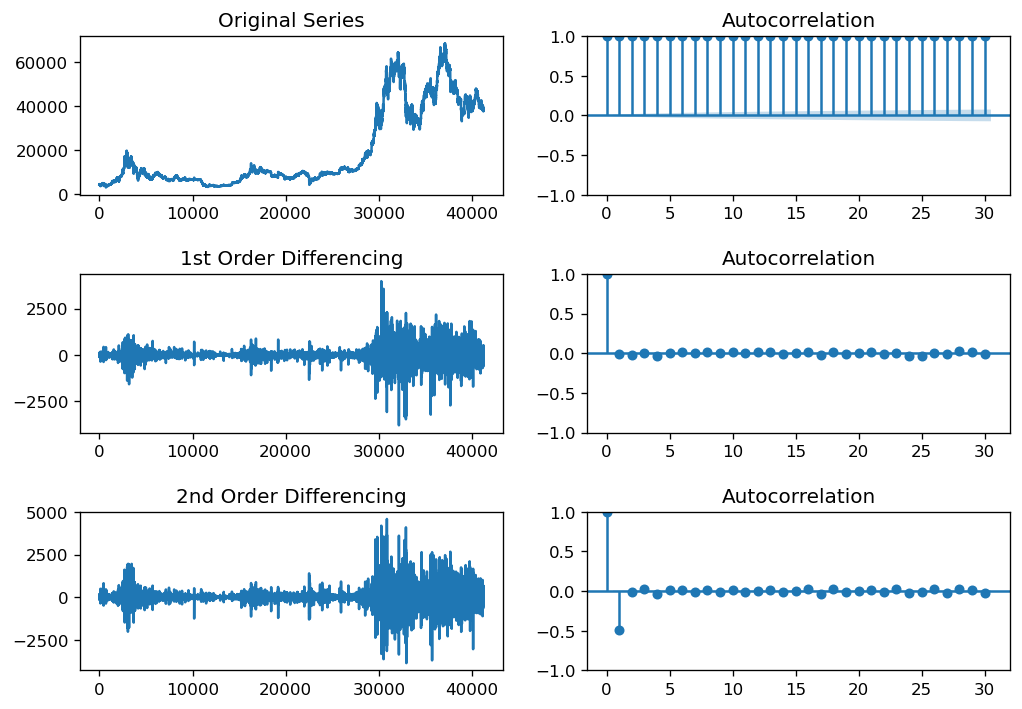

In [51]:
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
axes[0, 0].plot(train_normalized)
axes[0, 0].set_title('Original Series')
plot_acf(train_normalized, ax=axes[0, 1], lags=30)


# 1st Differencing
axes[1, 0].plot(np.diff(train_normalized))
axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(train_normalized), ax=axes[1, 1],lags=30)


# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(train_normalized)))
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(train_normalized)), ax=axes[2, 1],lags=30)

plt.show()


C:\Users\Athra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


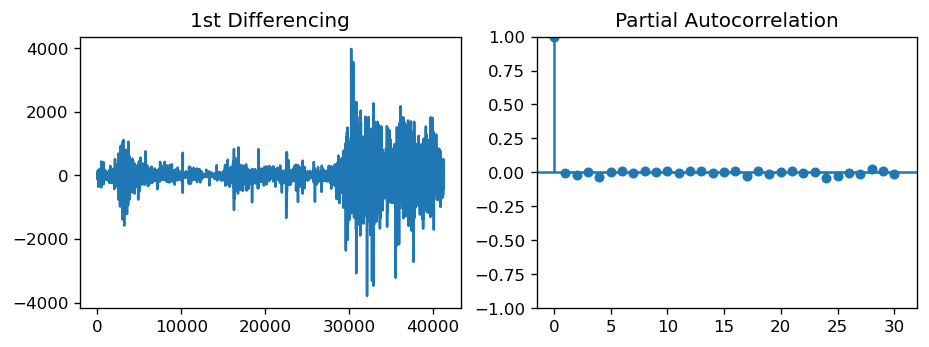

In [52]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(np.diff(train_normalized)) 
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(np.diff(train_normalized), ax=axes[1], lags=30)

plt.show()

In [53]:
#ARIMA
model = ARIMA(train_normalized, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                41262
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -280358.281
Date:                Wed, 17 Aug 2022   AIC                         560722.562
Time:                        01:34:59   BIC                         560748.445
Sample:                             0   HQIC                        560730.742
                              - 41262                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6648      0.065     10.178      0.000       0.537       0.793
ma.L1         -0.6794      0.064    -10.595      0.000      -0.805      -0.554
sigma2      4.672e+04     83.877    557.041      0.000    4.66e+04    4.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):           1444806.76
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):              10.18   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

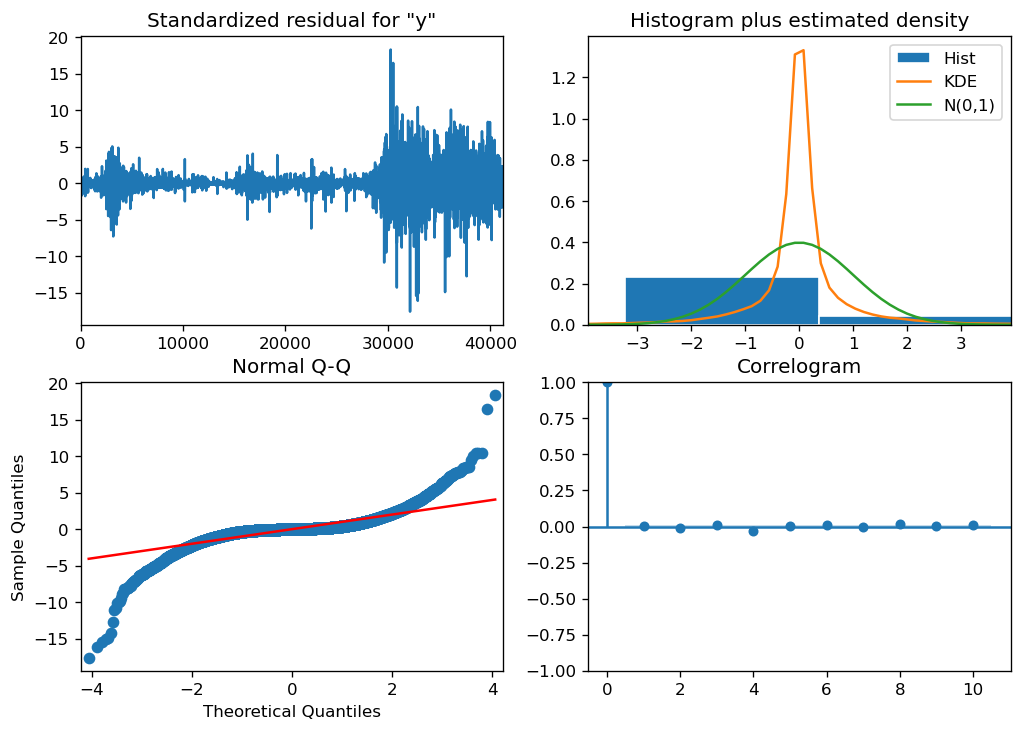

In [54]:
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
model_fit.plot_diagnostics()
plt.show()

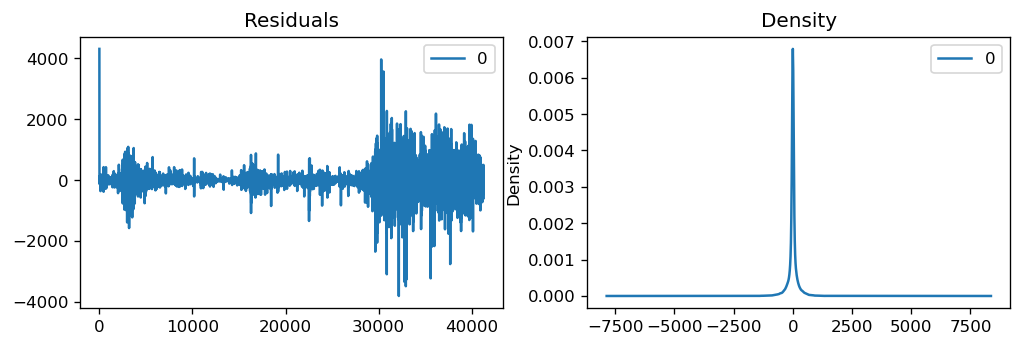

In [49]:
plt.rcParams.update({'figure.figsize':(10,3)})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [88]:
fc = model_fit.forecast(15, alpha=0.05)

In [81]:
# forecast, conf = fc.predicted_mean, fc.conf_int()
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

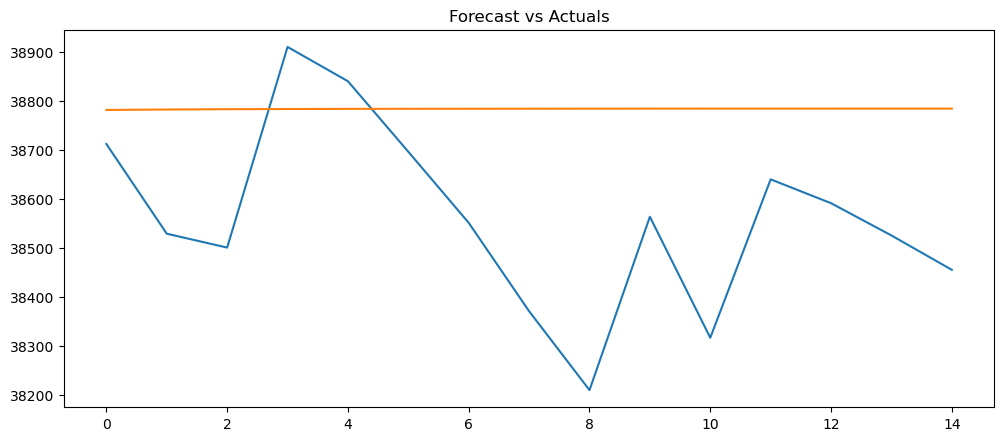

In [90]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.show()

## AUTO ARIMA ##

In [91]:
model = pm.auto_arima(train_normalized, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=7, max_q=7, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=560723.886, Time=26.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=560735.751, Time=1.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=560735.605, Time=1.82 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=560735.519, Time=3.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=560734.367, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=560723.282, Time=5.93 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=560722.172, Time=2.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=560723.971, Time=2.85 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=560725.993, Time=5.88 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=560720.822, Time=1.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=560734.231, Time=0.82 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=560722.619, Time=1.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=560713.537, Time=7.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=560722.562, Time=5.41 sec
 ARI

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                41262
Model:               SARIMAX(4, 1, 4)   Log Likelihood             -280310.368
Date:                Wed, 17 Aug 2022   AIC                         560638.737
Time:                        02:09:21   BIC                         560716.386
Sample:                             0   HQIC                        560663.279
                              - 41262                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0343      0.034      1.007      0.314      -0.033       0.101
ar.L2          0.5260      0.030     17.504      0.000       0.467       0.585
ar.L3          0.1905      0.023      8.300      0.000       0.146       0.235
ar.L4         -0.7590      0.028    -27.249      0.000      -0.814      -0.704
ma.L1         -0.0418      0.035     -1.206      0.228      -0.110       0.026
ma.L2         -0.5454      0.030    -18.062      0.000      -0.605      -0.486
ma.L3         -0.1853      0.024     -7.836      0.000      -0.232      -0.139
ma.L4          0.7443      0.029     26.081      0.000       0.688       0.800
sigma2      4.665e+04     85.958    542.733      0.000    4.65e+04    4.68e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):           1415179.99
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              10.17   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

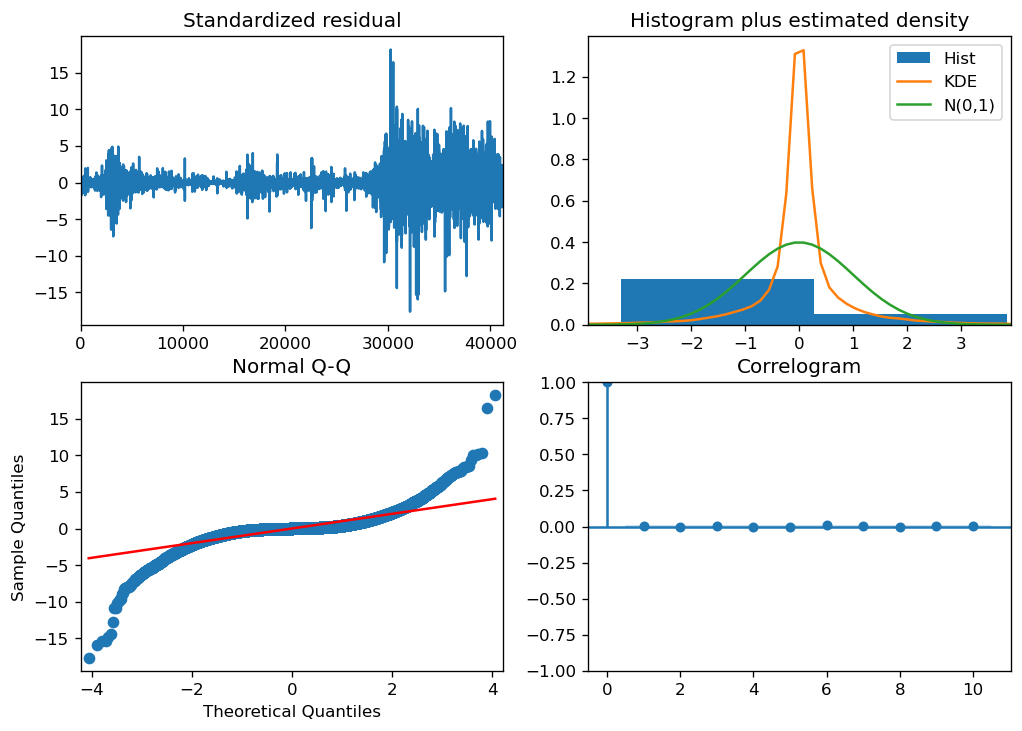

In [94]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

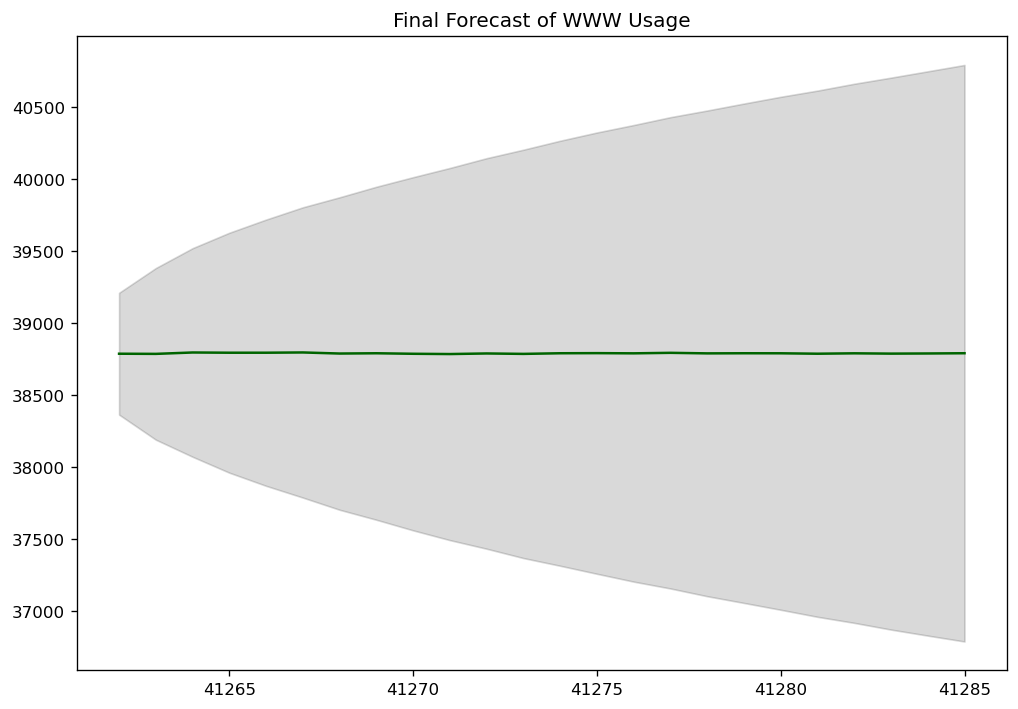

In [95]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train_normalized), len(train_normalized)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
# plt.plot(train_normalized)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()